# Pre-lab Exercise:  Precipitation Determination

## Learning Goals
- Apply knowledge of solution mixing and equilibria typical in a first-year college curricula
- Introduce ideas about error and precision
- Introduce laboratory automation (for synthesis and characterization) and learn where this is an appropriate strategy
- Develop basic computer and data handling skills

## Lab Objectives
- Introduce programming in Python
- Introduce  concentration space diagrams (*J. Chem. Educ.*  **98**, 1659-1666 (2021) https://pubs.acs.org/doi/10.1021/acs.jchemed.0c01456 for solution mixing and equilibrium problems
- Generate an experiment plan
- Conduct it in the laboratory by manual pipetting and automated liquid handlers/dispensers
- Analyze the experimental data using logistic regression

## Installation Instructions
- Install [Conda](https://conda.io/projects/conda/en/latest/user-guide/install/index.html)
- In your command line type `conda create --name chemistry-env`
- Type `conda activate chemistry-env`
    - Type `conda install scikit-learn scipy pandas ipywidgets jupyter` and ENTER
    - Type `conda install pip` and ENTER followed by `pip install mplcursors ipympl` and ENTER (interactive plots)
- Type `jupyter notebook` and open this file

## Python Basics

### Variables

**Variables** are reserved memory locations that store values.  Think of variables like a container that hold data which can be changed later in the program. For example to create a variable named `number` and assign its value as `100`:

In [1]:
number = 100
print(number)

100

This variable can be modified at any time

In [2]:
number = 99
print(number)

number = 1
print(number)

99
1


Variables can be used to perform arithmetic operations:

In [3]:
number + 5 * number

6

In general, valid variable names begin with an alphabetical character and do not contain special symbols such as spaces or hyphens; it is generally a good idea to start them with lowercase letters to avoid conflicting with built-in classes in Python.

**TRY IT:** Define a variable with your name, and perform some arithmetic calculations.

### Functions

**Functions** are sets of operations that take an action on some input.  Functions are defined by typing `def function_name(arguments):` where `arguments` are supplied to the function.

In [6]:
def absolute_value(num):
    if num >= 0:
        return num
    
    else:
        return -num

We can call functions by providing their names, for example, the absolute value of 2 is:

In [7]:
absolute_value(2)

2

And the absolute value of -4 is:

In [8]:
absolute_value(-4)

4

If we want to chain functions together, we can nest them inside parentheses. Functions are executed from the inside to outside:

In [10]:
absolute_value(-absolute_value(-4))

4

**TRY IT:** Define your own function that multiplies two numbers and returns the result.

### Advanced Topics

The code below uses some other features of variables in Python.  It is not necessary to study these in depth, but briefly examine them now, and you may want to refer to this if you need to modify the code.  Reviewing these will help you read some of the code examples that are introduced.

**Lists** can be used to store a series of values.  The list is defined by braces, `[]`.  Each entry in a List has an address that can be used to identify it.

In [12]:
number_list = [1, 2, -1, 1, -2.2, -43]

# In Python, 0 is the first element, length-1 is the last
print(number_list[0])
print(number_list[5])

1
-43


In Python, a function can be applied to a list in several ways, one is by using a `for` loop and applying the function to each element in the list:

In [13]:
for element in number_list:

    print(absolute_value(element))

1
2
1
1
2.2
43


We can also use `map()` to map a function over a list. Mapping a function means we need to pass in both the function we want to map, and the list we want to map over:

In [16]:
absolute_list = map(absolute_value, number_list)
print(list(absolute_list))

[1, 2, 1, 1, 2.2, 43]


We can implement associations in python using dictionaries. Dictionaries have keys and values that let us access values by entering in keys.

In [17]:
translate = {
    'apple' : 'manzana',
    'orange' : 'naranja'
}

In [19]:
translate.keys()

dict_keys(['apple', 'orange'])

In [20]:
translate.values()

dict_values(['manzana', 'naranja'])

**TRY IT:** Add a new word to the translate dictionary above. Try printing the translation value by entering the key (hint: dictionary values are accessed by supplying the key as an index.  For example:  `example_list[key] = val` sets the value associated with a `key`

### Libraries

The power of Python is that there are a plethora of libraries we can use to make data analysis, visualization, and manipulation easier. We `import` libraries and can give them more concise or readable names. Below we'll use [numpy](https://numpy.org) (a numerical computation library) and [matplotlib](https://matplotlib.org) (a graphing library) to create a figure. Later, we'll use other libraries to perform useful functions.

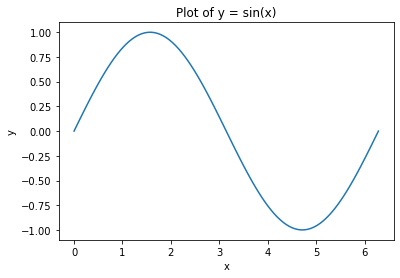

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate y = sin(x) data 
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Plot data
plt.plot(x, y)
plt.title('Plot of y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')

# Show our plot
plt.show()

We will use plots to visualize our data and numpy to perform operations on it.

**TRY IT** Use numpy and matplotlib to plot y = cos(x). Refer to [numpy](https://numpy.org/doc/stable/reference/index.html#reference) and [matplptlib](https://matplotlib.org/stable/users/index.html).

We will import some other libraries here:

In [2]:
import pandas as pd
import math
from scipy.spatial import ConvexHull, Delaunay
import mplcursors
from sklearn.linear_model import LogisticRegression

# Libraries for interactive sliders
import ipywidgets as widgets
from IPython.display import display

# Libraries for interactive sliders
import ipywidgets as widgets
from IPython.display import display

## Pre-Lab: An Introduction to Concentration Space Diagrams

### Solution Mixing in Concentration Space

Making solutions with desired compositions is an essential task for all chemistry students. In your previous coursework, you may have learned how calculate the result of mixing two stock solutions using a four-step arithmetic process of converting concentration and volume information to moles, adding the moles present in the new solution, calculating a new volume, and then dividing the new number of moles by the new volume; this presents several opportunities for error.  The inverse problem - whether a desired composition be made from two or more stock solutions - requires an algebraic treatment.  However, there is a simpler way of thinking about the problem in terms of Cartesian coordinates.

If there are two solutes,  X and Y,  the concentration of both solutes can be represented as a point, `[x_concentration, y_concentration]`.  If you read the section about Lists above, then you'll remember that a list of values is specified by putting the elements inside the squiggly brackets, `[]`, separated by a comma.  We'll use this notation so that you can enter the values directly into this Python notebook.  

- A neat solvent will have no solute, so its concentration point is `[0,0]`; this is denoted point (a) below.
- A 1.0 M stock solution of X corresponds to a point at `[1.0, 0]`, denoted as (b) below.
- A stock solution that is 1.0 M in Y corresponds to a point at `[0, 1.0]`, denoted as (c) below.

In [2]:
# Enable interactive plot in Jupyter notebook
%matplotlib widget

# Create initial plot
fig, ax = plt.subplots()
plt.xlim(0, 1)
plt.ylim(0, 1)

# Create a scatter plot with an initial point
point, = plt.plot(0.3, 0.3, 'ro')

# Initialize mixture lines
ab_line = [np.linspace(0, 1.0, 1000), np.linspace(0, 0, 1000)]
ac_line = [np.linspace(0, 0, 1000), np.linspace(0, 1.0, 1000)]
bc_line = [np.linspace(0, 1.0, 1000), 1 - np.linspace(0, 1.0, 1000)]

# Plot lines
plt.plot(ab_line[0], ab_line[1])
plt.plot(ac_line[0], ac_line[1])
line_bc, = plt.plot(bc_line[0], bc_line[1], label='BC')
plt.legend()

# Define a function to handle mouse movement events
def on_move(event):
    if event.inaxes == ax:
        x_new = max(min(event.xdata, 1), 0)
        y_new = max(min(event.ydata, 1), 0)
        if y_new > (1 - x_new):
            y_new = 1 - x_new
        point.set_data([x_new], [y_new])
        fig.canvas.draw()

# Connect the function to the mouse movement event
fig.canvas.mpl_connect('motion_notify_event', on_move)

# Enable cursor annotations
mplcursors.cursor(hover=True)

# Show plot
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Concentration of Y vs X')
plt.show()

ModuleNotFoundError: No module named 'ipympl'

Suppose you mix solutions (a) and (b):

- The mixture cannot be less concentrated in X than the neat solvent.
- The mixture cannot be more concentrated in X than the stock solution.  
- And any combination of (a) and (b) will not introduce any of solute Y, which is totally absent.  
- Therefore, the point describing the concentrations in the resulting mixture must be somewhere on the line between pure (a) and pure (b).  

The mixture between (a) and (b) along this line is defined by the equation: *v<sub>a</sub>*[0, 0] + *v<sub>b</sub>*[1.0, 1.0], where *v<sub>a</sub>* and *v<sub>b</sub>* are the **volume fractions** of (a) and (b), respectively, ranging from zero (absent) to one(pure). The sum of these fractions must total to 1, i.e., *v<sub>a</sub>* + *v<sub>b</sub>* = 1. Rearranging this expression allows us to express everything in terms of *v<sub>b</sub>*; we will assume that the remaining 1 - *v<sub>a</sub>* is made up by the neat solvent. This is known as **convex combination** of (a) and (b).

**TRY IT:** Try dragging the point past the diagonal line. Observe how the point cannot surpass the BC-mixture line.

- Any possible mixture of the three liquids, (a), (b), (c) sits within the triangle formed by the three points.
- More generally, a convex hull is the set of all possible convex combinations of the starting solutions.
    - A common analogy used to describe the convex hull is that it is the shape formed by pulling a rubber band (or in higher dimensions, an elastic sheet) over a set of points, resulting in the outermost points connected by straight lines
    - If you've taken linear algebra, then you'll observe that the concentration will be described by (1 - *v<sub>b</sub>* - *v<sub>c</sub>*)[0, 0] + *v<sub>b</sub>*[1.0, 0] + *v<sub>c</sub>*[0, 1.0] with *v<sub>b</sub>* + *v<sub>c</sub>* `<=` 1 (again, we implicitly defined *v<sub>a</sub>* = 1 - *v<sub>b</sub>* - *v<sub>c</sub>* so that *v<sub>a</sub>* + *v<sub>b</sub>* + *v<sub>c</sub>* = 1)

### Converting from Concentration to Volume Fractions

Suppose that we want to generate a solution with concentrations [X] = 0.2 M and [Y] =0.3 M.  This seems like it is inside the convex hull of possible mixtures, so it should be possible.  What volume fractions do we need to blend to achieve this point?

- **TRY IT:** Try moving the point to find the volume fraction that satisfies this point, calculate the implied volume fraction of (a).

Another approach is to have the computer perform this search. We begin by defining the different solutions and our target solution defining these as variables:

In [36]:
abc = np.array(
    [[0, 1.0, 0],
    [0, 0, 1.0],
    [1, 1, 1,]]
)
target = np.array([0.2, 0.3, 1])

Next we will solve a system of equations to find volume fractions.

In [39]:
# Numpy to find solution
solution = np.linalg.solve(abc, target)

# Print solutions
print(f'va -> {solution[0]}')
print(f'vb -> {solution[1]}')
print(f'vc -> {solution[2]}')

va -> 0.49999999999999994
vb -> 0.2
vc -> 0.3


### Generating and Visualizing Random Experiments in Concentration Space

Because the convex hull defines what mixtures are possible, by sampling points that are inside the convex hull we can define randomly-generated feasible experiments. To do this, we'll begin by using the definitions of a, b, c from above, generate the convex hull 

Vertices: [0 1 2]


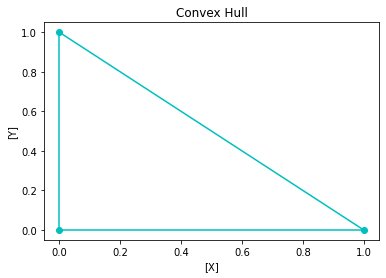

In [47]:
# Exit interactive plot
%matplotlib inline

# Initialize variables
a = [0, 0]
b = [1.0, 0]
c = [0, 1.0]

# Create hull
hull_points = np.array([a, b, c])
convex_hull = ConvexHull(hull_points)
print(f'Vertices: {convex_hull.vertices}')

plt.plot(hull_points[:,0], hull_points[:,1], 'o',color='c')
for simplex in convex_hull.simplices:
    plt.plot(hull_points[simplex, 0], hull_points[simplex, 1], 'c')

# Plot
plt.title('Convex Hull')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.show()

With this convex hull, we can generate random points inside the hull which represent random possible mixtures.

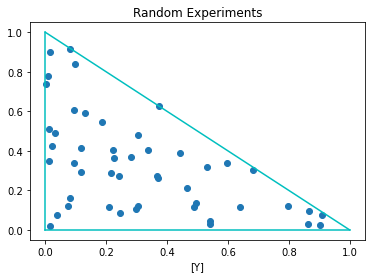

In [70]:
# Minimum and maximum coordinates
min = np.min(convex_hull.points, axis=0)
max = np.max(convex_hull.points, axis=0)

# Generate random
random_experiments = np.random.uniform(min, max, size=(100, convex_hull.points.shape[1]))

# Find the simplex with the random point
delauney_triangle = Delaunay(convex_hull.points)
simplex_index = delauney_triangle.find_simplex(random_experiments)
random_experiments = random_experiments[simplex_index >= 0]

# Reshape points
random_experiments = random_experiments.transpose()

# Plot experiments and hull
plt.scatter(random_experiments[0], random_experiments[1])
for simplex in convex_hull.simplices:
    plt.plot(hull_points[simplex, 0], hull_points[simplex, 1], 'c')

# Plot
plt.title('Random Experiments')
plt.xlabel('[X]')
plt.xlabel('[Y]')
plt.show()

### Equilibrium Expressions in Concentration Space

Suppose that we have a solubility equilibrium expression *K<sub>sp</sub>* = [*X*][*Y*]. What does this look like in concentration space? We can rearrange the function to get the expression [*Y*] = *K<sub>sp</sub>*/[*X*]. Let's plot the function in terms of the independent variable *x*. Watch out for dividing by zero! - so we will merely make the bottom limit sufficiently small.

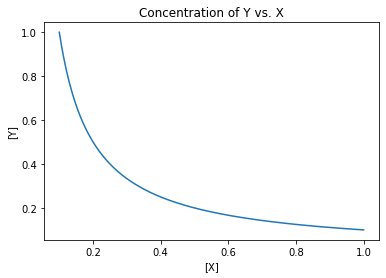

In [83]:
# Define equilibrium constant
Ksp = 10 ** -1

# Set x and y
x = np.linspace(10 ** -1, 1, 1000)
y = Ksp / x

# Plot
plt.title('Concentration of Y vs. X')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.plot(x, y)
plt.show()

Now let's combine it with the plots above:

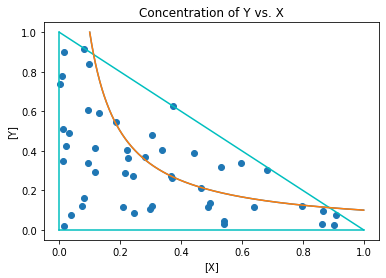

In [84]:
# Save all data to plot
plt.plot(x, y)
plt.scatter(random_experiments[0], random_experiments[1])
for simplex in convex_hull.simplices:
    plt.plot(hull_points[simplex, 0], hull_points[simplex, 1], 'c')

# Plot
plt.title('Concentration of Y vs. X')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.plot(x, y)
plt.show()

What does this plot tell us?

- The black equilibrium curve indicates choices of the concentration where the **reaction quotient**, <sub>Q</sub>, is equal to the **equilibrium constant**, *K<sub>sp</sub>*.
- Any point above the equilibrium curve corresponds to  *Q* > *K*. For a solubility reaction, this corresponds to a supersaturated solution. The precipitation reaction will proceed - consuming [X] and [Y] in the proper stoichiometries - precipitating solid until it reaches equilibrium. Therefore a mixture that starts at one of these points will result in a precipitate.
- Any point below the equilibrium curve corresponds to *Q* \> *K*. If there is no precipitate present at the beginning of the reaction, there is no source of additional [X] or [Y], and so no precipitation will occur.

### Solving for the Equilibrium Constant

Suppose that we performed a series of experiments in the laboratory for the reaction:

Pb<sup>2+</sup>(aq) + 2I<sup>-</sup>(aq) &#x21CC; PbI<sub>2</sub>(s)

Precipitation was observed for points in red, but no precipitation ocurred for the points in black. What is the equilibrium constant?

**TRY IT:** Derive an expression (on paper) for the equilibrium curve.

### Transforming Variables

What if instead of working directly with the concentrations, we instead took the (natural) logarithm of the equilibrium expression?

To be completely general, let us suppose that the equilibrium expression has the form: *K<sub>sp</sub>* = [*X*]<sup>*x*</sup>[*Y*]<sup>*y*</sup> where the small x and y are relevant stoichiometric coefficients for their respective species.

Taking the natural logarithm of both sides, we would have an expression of the form: 

ln *K<sub>sp</sub>* = *x* ln[*X*] + *y* ln[*Y*].

We can further simplify this expression by solving for ln[*Y*] = (ln*K<sub>sp</sub>* - ln[*X*])/*b*, where *b* = *y*/*x*, as only the ratio is uniquely determined. Below is the same example data used above for the PbI<sub>2</sub> precipitation reaction, but replotted on a logarithmic scale.

**TRY IT:** Use the slider bars below to  find the parameters that best fit this data?  How well does it agree with the values determined above?   Observe that you now have two variables that you can change, which adds an additional fitting parameter, and in turn some extra freedom but also ambiguity in the result.  Because you know the stoichiometry, can you set the *b* parameter to be consistent with that knowledge to simplify the fitting process? 

In [88]:
# Hidden example points
points = np.array([
    [-5.559606049571456, -6.344053953197228],
    [-7.846282817916988, -4.949606591270226],
    [-7.496879777482184, -4.759583177845726],
    [-7.448661439775135, -4.857507267791798],
    [-6.740949116429121, -4.888295695300465],
    [-6.609207223854006, -4.976784446022729],
    [-6.648927285968798, -4.792939031803738],
    [-6.676730727561633, -5.5887005398931064],
    [-6.720120422645416, -6.237150453823191],
    [-6.460837060020223, -6.533816297910248],
    [-6.059335952547188, -5.7376759768634455],
    [-6.12681506705027, -5.14357989153987],
    [-5.83513209926329, -5.481622116958785],
    [-5.72006888602658, -5.155694382583785],
    [-5.704356612336286, -5.465726267575118],
    [-5.474051876685285, -5.338316084240179],
    [-5.235394070806047, -6.035285279636943],
    [-5.195012684779468, -5.772148332169686],
    [-5.070355384485747, -6.203729144597459],
    [-5.278939504285439, -7.249183690052004],
    [-4.854122026675655, -7.593099961479201],
    [-4.668745184899846, -7.523527030768491]
])

# Transpose for plotting
points = points.transpose()

FloatSlider(value=2.0, description='b', max=3.0, min=0.001, step=0.01)

FloatSlider(value=1e-05, description='Ksp', max=0.01, min=1e-05, step=0.0001)

interactive(children=(FloatSlider(value=2.0, description='b', max=3.0, min=0.001, step=0.01), Output()), _dom_…

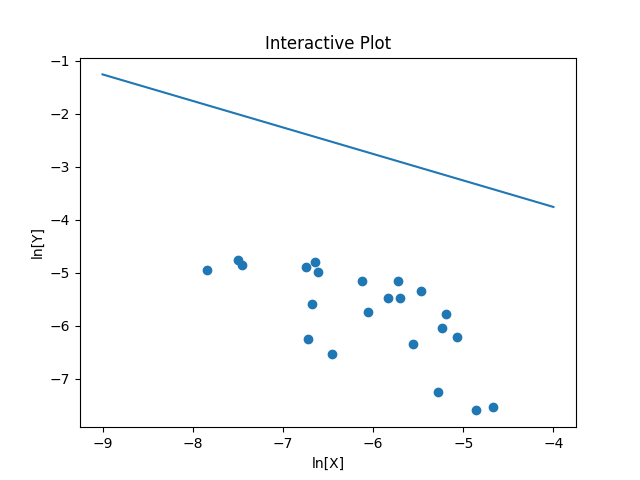

In [108]:
# Create initial plot
fig, ax = plt.subplots()
plt.xlabel('ln[X]')
plt.ylabel('ln[Y]')
plt.title('Interactive Plot')
plt.scatter(points[0], points[1])

# Define the range of x values
x = np.linspace(-9, -4, 1000)

# Initial equilibrium expression values
b_initial = 2.0
Ksp_initial = 10 ** -5
y_initial = (np.log(Ksp_initial) - x) / b_initial

# Create the initial line
line, = plt.plot(x, y_initial)

# Function to update the line based on the slider values
def update_line(change):
    b = b_slider.value
    Ksp = ksp_slider.value
    y = (np.log(Ksp) - x) / b
    line.set_ydata(y)
    fig.canvas.draw()

# Define the slider widgets
b_slider = widgets.FloatSlider(value=b_initial, min=0.001, max=3, step=0.01, description='b')
ksp_slider = widgets.FloatSlider(value=Ksp_initial, min=0.00001, max=0.01, step=0.0001, description='Ksp')

# Attach the update function to the sliders' value change events
b_slider.observe(update_line, 'value')
ksp_slider.observe(update_line, 'value')

# Create interactive plot
interactive_plot = widgets.interactive(update_line, change=b_slider)

# Display the sliders and plot
display(b_slider)
display(ksp_slider)
display(interactive_plot)

# Show the plot
plt.show()

### Logistic Regression

You have probably performed regression calculations in the past - fitting a line (described by the formula *y = mx + b*) to describe the relationship between input values x and output values y.  In the above example, we are doing nearly the same thing - except the goal of our line is to best *separate* the two classes of items. 

We call such types of problems *classification problems*, which are a subgenre of supervised *machine learning methods*.  But don't let those fancy words confuse you, we merely trying to find a mathematical function (in this case a line) that separates the different types the two classes of items. Practically speaking, there are many different algorithms which vary in terms of the types of functions that are allowed and how the unknown parameters are obtained.

We will use a very simple type of model known as a *logistic regression*. This model has the advantage that its mathematical form corresponds closely to our equilibrium expression, ln*K<sub>sp</sub>* = *x*ln[*X*] + *y*ln[*Y*]. What we will do is merely subtract ln*K<sub>sp</sub>* from both sides to find the function *y* = -ln*K<sub>sp</sub>* + *x*ln[*X*] + *y*ln[*Y*], where we use y to denote the outcome (crystallization or not). This would result in solving for three unknown parameters (ln*K<sub>sp</sub>*, and the two unknown stoichiometric coefficients x and y).

Let's try an example.  The data you have been working with in the plots has been stored for you in the following variable, where each sublist contains the concentration of X and Y (in our case, [Pb<sup>2+</sup>] and [I<sup>-</sup>]) and the outcome coded as a zero or one):

In [31]:
secret_example_data = np.array([
    [0.00124592, 0.00686514, 1],
    [0.00276404, 0.00697626, 1],
    [0.00110926, 0.00644622, 1],
    [0.00115605, 0.00276355, 0],
    [0.00402267, 0.00154224, 0],
    [0.00741375, 0.000508806, 0],
    [0.00129914, 0.00294887, 0],
    [0.000215272, 0.00770002, 0],
    [0.000769694, 0.00407783, 0],
    [0.000960827, 0.003942, 1],
    [0.00754699, 8.9936 * (10 ** -6), 0],
    [0.00858728, 0.000943677, 0],
    [0.00126882, 0.00571089, 1],
    [0.00133014, 0.00641984, 1],
    [0.00166377, 0.00664776, 1],
    [0.00604032, 0.00113081, 0],
    [0.00763432, 0.00147013, 1],
    [0.00937362, 0.000151323, 0],
    [0.00240833, 0.000770926, 0],
    [0.00376675, 0.00590764, 1],
    [0.00376717, 0.00218291, 1],
    [0.00607652, 0.00226287, 1],
    [0.00219158, 0.00413744, 1],
    [0.000890814, 0.00812371, 1]
])

In Python, a standard practice for working with data science tasks like this is to save data into a dataset. We can use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to save our points into a DataFrame. This will let us perform operations on our data and apply machine learning techniques with ease. Below, we can prepare our data for Regression by applying log transformation to [Pb<sup>2+</sup>] and [I<sup>-</sup>]

In [28]:
# Store data to dataframe
secret_example_dataframe = pd.DataFrame(secret_example_data, columns=['Pb_conc', 'I_conc', 'outcome'])

# Log transformation of Pb/I concentrations
secret_example_dataframe['Pb_conc'] = np.log(secret_example_dataframe['Pb_conc'])
secret_example_dataframe['I_conc'] = np.log(secret_example_dataframe['I_conc'])

# Examine dataset
secret_example_dataframe.head()

,Pb_conc,I_conc,outcome
0,-6.687881,-4.981299,1.0
1,-5.891062,-4.965242,1.0
2,-6.804062,-5.044261,1.0
3,-6.762746,-5.891239,0.0
4,-5.515809,-6.474519,0.0


It looks like our transformations were successful, before moving on I will provide a brief note about the usefulness of Pandas for dataset manipulation and visualization. Pandas provides many features that let us explore data. For example we can see the size or shape of our data:

In [218]:
# Print size
secret_example_dataframe.shape

(24, 3)

We can see the data types, null count (any missing values), and column names of the dataset by using the `info()` method:

In [219]:
secret_example_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pb_conc  24 non-null     float64
 1   I_conc   24 non-null     float64
 2   outcome  24 non-null     float64
dtypes: float64(3)
memory usage: 704.0 bytes


We can even get statistical metrics just by calling the `describe()` method:

In [6]:
secret_example_dataframe.describe()

,Pb_conc,I_conc,outcome
count,24.000000,24.000000,24.000000
mean,-6.050152,-6.141862,0.541667
std,0.968331,1.541648,0.508977
min,-8.443608,-11.618997,0.000000
25%,-6.706597,-6.588009,0.000000
50%,-6.075977,-5.681200,1.000000
75%,-5.107804,-5.047337,1.000000
max,-4.669856,-4.812968,1.000000


There are many other useful functions that you can try out on your own and explore on the [Pandas website](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html). For now, let's move on to machine learning. For our machine learning tasks we will use [scikit-learn](https://scikit-learn.org/). This resource provides an enormous amount of functionality for preprocessing data, training machine learning models, and testing their performance. Our task is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and in a few lines of code we'll train a machine learning model to predict mixture outcomes:

In [10]:
X = secret_example_dataframe[['Pb_conc', 'I_conc']]
y = secret_example_dataframe['outcome']

# Initialize model and fit
model = LogisticRegression()
model.fit(X, y)

# Save parameters
result = model.coef_
const = model.intercept_

(When you run this on your own data, you may get some warning messages about small or large parameters; this is because there is no unique solution to this equation if there is a line that can perfectly divide the two classes of outcomes.). 

In [17]:
result

array([[0.89848939, 1.82765907]])

In [12]:
const

array([16.51383554])

The first entry corresponds to -ln*K<sub>sp</sub>*.  You'll notice that the parameters are all large - this is because we can always increase the scale of the parameters together and obtain an equally good fit.  So we have to pick one of the values to serve as our normalization factor.  It seems reasonable to assume that the stoichiometry of lead in the reaction is "1", so let's divide by that parameter (the second entry in the list):

In [18]:
result[0] / result[0][0]

array([1.        , 2.03414651])

Not bad!  This mostly roughly predicts the stoichiometry of the other species (which should be 2) as well as the -ln*K<sub>sp</sub>*. (notice how the sign is opposite).  If we added more data (say 96 experiments instead of 24) we might expect this to converge to the "right" answer.  These are comparable to the types of variations that you might observed when trying to fit the parameters yourself using the interactive plots.

It is often the case that we can add our own scientific information to better constrain the solution.  If we impose our knowledge of the stoichiometry of the problem, then we can reduce the formula we fit to be one of the form *y* = -ln*K<sub>sp</sub>* + (1ln[*X*] + 2ln[*Y*]). Or stated another way, let's define a new variable *z* = (1ln[*X*] + 2ln[*Y*]), and find *y* = -ln*K<sub>sp</sub>* + *z*. Now we only have one free parameter - our equilibrium constant. We'll define a different data transformation function:

In [32]:
def constrained_transform(data):
    '''
    Function to transform our data to fit one free parameter

    @param data : the data to transform
    @return data : transformed data
    '''
    # Iterate through data list
    new_data = []
    for element in data:

        # Transform
        element = [1 * np.log(element[0]) + 2 * np.log(element[1]), element[2]]
        new_data.append(element)

    # Return data
    return new_data

And then apply it to our data and find the fit:

(NOTE: First, re-evaluate the cell where the `secret_example_data` list is defined. We have transformed it in some code above so we must "reset" it so to speak).

In [38]:
# Transform data
transformed_secret_example_data = constrained_transform(secret_example_data)

# Save to dataframe
transformed_secret_example_dataframe = pd.DataFrame(
    transformed_secret_example_data,
    columns=['z', 'outcome']
)

# View data
transformed_secret_example_dataframe.head()

,z,outcome
0,-16.650479,1.0
1,-15.821547,1.0
2,-16.892585,1.0
3,-18.545225,0.0
4,-18.464848,0.0


In [39]:
# Define variables
X = transformed_secret_example_dataframe['z'].values.reshape(-1, 1)
y = transformed_secret_example_dataframe['outcome']

# Initialize model
model = LogisticRegression()

# Fit to data
model.fit(X, y)

# Coefs and intercept
result = model.coef_
const = model.intercept_

In [40]:
result

array([[1.92375742]])

In [41]:
print(f'const: {const[0] / result[0][0]}')
print(f'z: {result[0] / result[0][0]}')

const: 18.013421816654365
z: [1.]


This should be in vary good agreement with the values you obtained from your fitting, where we constrained the equilibrium curves to have the "correct" stoichiometry.

### Exporting Instructions to the Real World

In the animations above you have been using simulated data.  But in a real laboratory setting you will want to generate the example mixture points and then export the instructions.  To do this, you will have to combine some of the strategies we've demonstrated above.

First, you've already seen how to define random concentration samples:

In [72]:
# Initialize variables
a = [0, 0]
b = [0.01, 0]
c = [0, 0.01]

# Create hull
hull_points = np.array([a, b, c])
convex_hull = ConvexHull(hull_points)

# Sample points
x_min, y_min = np.min(hull_points, axis=0)
x_max, y_max = np.max(hull_points, axis=0)

random_experiments = []
for i in range(50):

    # Generate random point
    random_experiments.append([np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)])

# Print experiments
print(random_experiments)

[[0.0008598114603614404, 0.009050949504199372], [0.004646666653441892, 0.0057177185113448225], [0.00674681204312306, 0.0013712332228621772], [0.005710251917943739, 0.0072095127905696926], [0.009847956660084072, 0.005670836644770618], [0.0054737773994279725, 0.00010033462488265755], [0.007538003788623877, 0.009100699007462075], [0.002239154968306788, 0.005524432274216368], [0.0019607923194292377, 0.0005928671200341829], [0.0060478821230036325, 0.009253312510345953], [0.008870309692139677, 0.009550086267486782], [0.0032360319210944653, 0.008453350650060925], [0.0035226433877385754, 0.0049560462532501496], [0.009016527297368522, 0.009260762553223336], [0.008357659691003778, 0.005480104285326517], [0.006403802122815766, 0.00240654044862031], [0.00786879631143724, 0.0009832269700122808], [0.0035138745877568, 0.004315477392598842], [0.005632735681100083, 0.0002841498666407227], [0.009644655857668202, 0.0008217099000392103], [0.003582427012180486, 0.0015435601307387027], [0.00635384622375258,

Next, we'll need to determine the volume fraction for each target.  Because this is something we need to do for each point, we'll define a function for the process (with a few extra modifications to get the data into a simplified form). Notice how although we only need 24 samples, we made 50. You will see why in the code below.

In [74]:
def volume_fractions(data, stock_conc):
    '''
    Function to generate volume fractions

    @param stock_conc : np array of stock concentrations
    @return volumes : resulting volumes
    '''
    # For element in data, generate random
    volumes = []
    i = 0
    while len(volumes) < 24:

        # Solve for values
        target = [data[i][0], data[i][1], 1]
        solution = np.linalg.solve(stock_conc, target)

        # Append to list
        i += 1
        if all(x > 0 for x in solution):
            volumes.append([solution[0], solution[1], solution[2]])

        else:
            continue

    # Return volumes
    return volumes

Now, we'll apply this to the randomly generated experiments to create a list of the corresponding volume fractions applying it to each item. Unfortunately, numpy linear algebra solver does not let us specify that all values must be greater than or equal to 0. So we enforce this by generating more random samples than we need and only including valid ones where all values are positive:

In [75]:
stock_abc = np.array(
    [[0, 0.01, 0],
    [0, 0, 0.01],
    [1, 1, 1,]]
)

corresponding_volume_fractions = volume_fractions(random_experiments, stock_abc)
corresponding_volume_fractions

[[0.008923903543918699, 0.08598114603614404, 0.9050949504199373],
 [0.18819547340147624, 0.674681204312306, 0.1371233222862177],
 [0.442588797568937, 0.5473777399427973, 0.010033462488265754],
 [0.22364127574768441, 0.22391549683067882, 0.5524432274216368],
 [0.744634056053658, 0.19607923194292376, 0.059286712003418285],
 [0.15213103590112753, 0.35226433877385754, 0.4956046253250149],
 [0.11896574285639239, 0.6403802122815766, 0.240654044862031],
 [0.11479767185504797, 0.786879631143724, 0.09832269700122807],
 [0.21706480196443578, 0.35138745877568, 0.4315477392598842],
 [0.40831144522591944, 0.5632735681100083, 0.02841498666407227],
 [0.48740128570808117, 0.3582427012180486, 0.15435601307387026],
 [0.6471753231233461, 0.3389775248780418, 0.013847151998612084],
 [0.4352546023369669, 0.43201573081002576, 0.13272966685300736],
 [0.17599097770314664, 0.7413576905497277, 0.08265133174712569],
 [0.4601554574974568, 0.3971482424452847, 0.14269630005725853],
 [0.6086650738541382, 0.0086026829

Of course, you don't want to generate a fractional volume in the laboratory---you want to generate a desired total volume. This can be obtained by multiply this fraction by the total volume (expressed in the relevant units), let's say it is 300 microliters. It's probably unrealistic to expect that you can obtain sub-microliter precision in the lab; in practice it will likely be even less than this depending on how the experiment is performed.  So let's be more realistic and truncate this to single microliters; we can do this using the math floor function to obtain just the integer amounts.

In [76]:
for i in range(len(corresponding_volume_fractions)):
    corresponding_volume_fractions[i] = [math.floor(300 * corresponding_volume_fractions[i][j]) for j in range(3)]

# New volume fractions
corresponding_volume_fractions

[[2, 25, 271],
 [56, 202, 41],
 [132, 164, 3],
 [67, 67, 165],
 [223, 58, 17],
 [45, 105, 148],
 [35, 192, 72],
 [34, 236, 29],
 [65, 105, 129],
 [122, 168, 8],
 [146, 107, 46],
 [194, 101, 4],
 [130, 129, 39],
 [52, 222, 24],
 [138, 119, 42],
 [182, 2, 114],
 [166, 30, 103],
 [22, 155, 121],
 [93, 100, 105],
 [73, 177, 49],
 [48, 162, 88],
 [255, 43, 1],
 [180, 70, 49],
 [67, 211, 21]]

Finally, you'll need to get this to the human or robot who will be performing the experiment.   We will do this by exporting to a Comma Separated Value (CSV) file, using the `to_csv()` method. 

**(Ultimately, the robot control programs accept different types of file formats, and your instructor or TA will  elp you convert the exported CSV file to an appropriate input format.  If you are not using a robot, then you can just print the CSV file and use it to guide your manual pipetting.)** 

To export the file, you'll define a pandas dataframe, `corresponding_volume_fractions_df` to contain the data, and then call the `.to_csv()` method (providing a filename and other options) to that dataframe to write the file:

In [78]:
corresponding_volume_fractions_df = pd.DataFrame(corresponding_volume_fractions)
corresponding_volume_fractions_df.to_csv('my_experiments.csv', header=False)

Look for the `my_experiments.csv` file on your computer and open it to confirm that you have exported the appropriate columns of data.

### Importing Result Data and Fitting a Model

Suppose that you've saved a set of results describing the volume of your three stock solutions and the outcome stored in an CSV file---each row corresponds to the list `[volume_of_a, volume_of_b, volume_of_c, outcome]`.  What are the steps that we need to take?

1. Import the contents of the file to a Python.
2. Convert the volumes to concentrations (given the known stock solutions).
3. Convert the concentrations to logarithms (with or without adding the stoichiometric constraint).
4. Perform the Logistic Regression Fit to determine the equilibrium constant.

Let's start  with the first step.  Your instructor will provide you with an `example_results.csv` file.  Place it somewhere you can find it and import it:

In [79]:
example_data = pd.read_csv('example_results.csv').values.tolist()

# Print list
example_data

[[104, 46, 150, 1],
 [75, 17, 208, 1],
 [96, 168, 36, 0],
 [125, 53, 122, 0],
 [22, 188, 90, 1],
 [61, 191, 47, 0],
 [20, 137, 143, 1],
 [62, 172, 66, 0],
 [5, 181, 114, 1],
 [141, 73, 86, 0],
 [37, 145, 118, 1],
 [31, 201, 68, 1],
 [45, 182, 73, 0],
 [170, 37, 93, 0],
 [205, 61, 34, 0],
 [75, 95, 130, 1],
 [3, 51, 246, 1],
 [17, 49, 234, 1],
 [70, 170, 60, 0],
 [119, 94, 88, 0],
 [132, 16, 151, 0],
 [26, 88, 186, 1],
 [147, 30, 123, 0],
 [136, 121, 43, 0],
 [83, 182, 36, 0],
 [190, 106, 4, 0],
 [111, 42, 147, 1],
 [57, 186, 57, 0],
 [69, 94, 137, 1],
 [41, 231, 28, 0],
 [249, 4, 48, 0],
 [4, 138, 158, 1],
 [73, 43, 184, 1],
 [280, 7, 13, 0],
 [241, 59, 0, 0],
 [84, 168, 48, 0],
 [14, 35, 251, 1],
 [24, 176, 100, 1],
 [13, 157, 130, 1],
 [156, 50, 94, 0],
 [250, 18, 32, 0],
 [70, 87, 143, 1],
 [41, 71, 188, 1],
 [29, 271, 1, 0],
 [118, 69, 113, 1],
 [243, 26, 30, 0],
 [35, 210, 54, 0],
 [150, 122, 27, 0],
 [213, 82, 5, 0],
 [1, 101, 199, 1],
 [125, 114, 62, 0],
 [220, 21, 59, 0],
 [16,

After reading the data, let's define a function to convert the volumes to concentrations:

In [80]:
def to_concentration(a, b, c, data):
    '''
    @param a : water component
    @param b : The PbSO4 component
    @param c : The KI component

    @return concentrations : concentration list
    '''
    # Iterate elements and convert
    concentrations = []
    for element in data:

        # Append concentrations to list
        concentrations.append(
            [a[0] * element[0] + b[0] * element[1] + c[0] * element[2],
            a[1] * element[0] + b[1] * element[1] + c[1] * element[2],
            element[3]]
        )

    # Return list
    return concentrations

We'll assume the same fictitious stock solutions used above and apply this function to compute the concentrations:

In [81]:
# Vertices
a = [0, 0]
b = [0.01, 0]
c = [0, 0.01]

# Generate concentrations
computed_concentrations = to_concentration(a, b, c, example_data)
computed_concentrations

[[0.46, 1.5, 1],
 [0.17, 2.08, 1],
 [1.68, 0.36, 0],
 [0.53, 1.22, 0],
 [1.8800000000000001, 0.9, 1],
 [1.9100000000000001, 0.47000000000000003, 0],
 [1.37, 1.43, 1],
 [1.72, 0.66, 0],
 [1.81, 1.1400000000000001, 1],
 [0.73, 0.86, 0],
 [1.45, 1.18, 1],
 [2.0100000000000002, 0.68, 1],
 [1.82, 0.73, 0],
 [0.37, 0.93, 0],
 [0.61, 0.34, 0],
 [0.9500000000000001, 1.3, 1],
 [0.51, 2.46, 1],
 [0.49, 2.34, 1],
 [1.7, 0.6, 0],
 [0.9400000000000001, 0.88, 0],
 [0.16, 1.51, 0],
 [0.88, 1.86, 1],
 [0.3, 1.23, 0],
 [1.21, 0.43, 0],
 [1.82, 0.36, 0],
 [1.06, 0.04, 0],
 [0.42, 1.47, 1],
 [1.86, 0.5700000000000001, 0],
 [0.9400000000000001, 1.37, 1],
 [2.31, 0.28, 0],
 [0.04, 0.48, 0],
 [1.3800000000000001, 1.58, 1],
 [0.43, 1.84, 1],
 [0.07, 0.13, 0],
 [0.59, 0.0, 0],
 [1.68, 0.48, 0],
 [0.35000000000000003, 2.5100000000000002, 1],
 [1.76, 1.0, 1],
 [1.57, 1.3, 1],
 [0.5, 0.9400000000000001, 0],
 [0.18, 0.32, 0],
 [0.87, 1.43, 1],
 [0.71, 1.8800000000000001, 1],
 [2.71, 0.01, 0],
 [0.6900000000000001

Now it's in the form of a problem that we already solved in the section on Logistic Regressions. We merely have to use the functions that we defined there to obtain the results by Log transforming the data and obtaining the logistic regression parameters.

**TRY IT:**  Starting with the `computed_concentration` variable defined above as the input, use the function from the Logistic Regression section to obtain the equilibrium constant.  You should obtain nearly the same result as above; the difference results from the finite precision of the dispense volumes that we introduced with `math.floor`.

### Performing your own experiments in the laboratory

You've now practiced all of the basic skills that you need to generate experiment plans and process the results for the laboratory experiment.  To recap, the steps are:

1. Define the stock solutions you will be using in terms of a list of concentration points.
2. Define the Convex Hull containing these points
3. Generate concentrations for 96 sample experiments
4. Convert those concentrations into volume fractions and then scale to the desired total volume of 300 uL to obtain the amount in uL to be dispensed by the robot.
5. Export the volumes you computed to a CSV format file.
6. Perform the experiments, and store the results in your spreadsheet.
7. Read the results into Python notebook with pandas
8. Visualize your results.
9. Use scikit-learn logistic regression functions to fit equilibrium constant parameters.